# This notebook is for stage 2 cleaning and EDA

In [23]:
#import modules
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import pprint
import seaborn as sns
from pprint import pprint

## Loading and initial inspection

In [24]:
#change this file to access different subsets of the data stored in csv files
alldogs_merged = pd.read_csv('./data_all/alldogs_merged_all.csv')

In [3]:
len(alldogs_merged)

1472050

In [4]:
alldogs_merged.head()

,adoption_time,age,attributes.declawed,attributes.house_trained,attributes.shots_current,attributes.spayed_neutered,attributes.special_needs,breeds.mixed,breeds.primary,breeds.secondary,...,month,name,organization_id,published_at,size,status,status_changed_at,tags,url,year
0,20,Adult,NaN,True,True,True,False,False,Japanese Chin,NaN,...,10,Madonna,CA712,2012-09-13T12:51:33+0000,Small,adopted,2012-10-04T11:36:05+0000,[],https://www.petfinder.com/dog/madonna-24113097...,2012
1,96,Adult,NaN,True,True,True,False,False,Japanese Chin,NaN,...,11,"Bess (located in Birmingam, AL)",CA712,2016-08-08T19:15:43+0000,Small,adopted,2016-11-13T08:14:08+0000,[],https://www.petfinder.com/dog/bess-located-in-...,2016
2,98,Young,NaN,True,True,True,False,True,Scottish Terrier,NaN,...,1,Madonna,TX1860,2014-10-14T09:20:08+0000,Small,adopted,2015-01-20T17:31:49+0000,[],https://www.petfinder.com/dog/madonna-30542160...,2015
3,32,Adult,NaN,True,True,True,False,False,Bullmastiff,NaN,...,3,AL - Sweetie/Birmingham,FL653,2018-02-21T00:02:35+0000,Extra Large,adopted,2018-03-25T13:18:45+0000,[],https://www.petfinder.com/dog/al-sweetie-birmi...,2018
4,16,Young,NaN,True,True,True,False,False,Bullmastiff,NaN,...,11,AL - Rosie/Prattville,FL653,2015-10-26T11:05:40+0000,Large,adopted,2015-11-11T18:28:03+0000,[],https://www.petfinder.com/dog/al-rosie-prattvi...,2015


In [5]:
state_info = pd.read_csv('stats_all.csv')
mean_adpt_time = {}
#create a dict with each state and average adoption time
for state_pos in range(1,49):
    current_state = state_info['state'][state_pos]
    key = current_state
    val = alldogs_merged[alldogs_merged['contact.address.state'] == current_state]['adoption_time'].mean()
    mean_adpt_time[key] = val
pprint(mean_adpt_time)

{'CA': 184.01237496363595,
 'MN': 102.96562054208273,
 'NY': 227.69666935576814,
 'TX': 140.0659042704393}


In [5]:
alldogs_merged.groupby('contact.address.state')['adoption_time'].mean().sort_values()

contact.address.state
MT     36.828786
WY     46.584674
ID     49.849677
SC     67.454908
NH     70.808894
MS     83.079180
PA     84.188627
CO     85.838635
OH     87.721029
VT     88.836907
IL     93.102591
ND     93.470378
WA     93.814776
MN    102.965621
RI    107.201073
MA    108.364548
WI    109.686375
MD    110.435780
VA    118.225938
LA    120.193585
ME    122.736462
AK    124.820449
AR    125.363077
UT    125.400673
TN    131.549588
AZ    138.621148
TX    140.065904
GA    141.359581
NE    144.288541
KS    153.267549
NM    162.038734
KY    166.339105
IA    166.441197
CT    167.932088
AL    169.512191
NJ    173.957788
MO    174.401168
IN    174.763227
CA    184.012375
OR    189.981649
WV    204.210876
FL    211.237100
MI    222.346728
NY    227.696669
OK    238.790731
NV    265.662577
DE    276.759936
NC    288.047769
SD    379.557841
Name: adoption_time, dtype: float64

In [25]:
alldogs_merged.head()

,adoption_time,age,attributes.declawed,attributes.house_trained,attributes.shots_current,attributes.spayed_neutered,attributes.special_needs,breeds.mixed,breeds.primary,breeds.secondary,...,month,name,organization_id,published_at,size,status,status_changed_at,tags,url,year
0,20,Adult,NaN,True,True,True,False,False,Japanese Chin,NaN,...,10,Madonna,CA712,2012-09-13T12:51:33+0000,Small,adopted,2012-10-04T11:36:05+0000,[],https://www.petfinder.com/dog/madonna-24113097...,2012
1,96,Adult,NaN,True,True,True,False,False,Japanese Chin,NaN,...,11,"Bess (located in Birmingam, AL)",CA712,2016-08-08T19:15:43+0000,Small,adopted,2016-11-13T08:14:08+0000,[],https://www.petfinder.com/dog/bess-located-in-...,2016
2,98,Young,NaN,True,True,True,False,True,Scottish Terrier,NaN,...,1,Madonna,TX1860,2014-10-14T09:20:08+0000,Small,adopted,2015-01-20T17:31:49+0000,[],https://www.petfinder.com/dog/madonna-30542160...,2015
3,32,Adult,NaN,True,True,True,False,False,Bullmastiff,NaN,...,3,AL - Sweetie/Birmingham,FL653,2018-02-21T00:02:35+0000,Extra Large,adopted,2018-03-25T13:18:45+0000,[],https://www.petfinder.com/dog/al-sweetie-birmi...,2018
4,16,Young,NaN,True,True,True,False,False,Bullmastiff,NaN,...,11,AL - Rosie/Prattville,FL653,2015-10-26T11:05:40+0000,Large,adopted,2015-11-11T18:28:03+0000,[],https://www.petfinder.com/dog/al-rosie-prattvi...,2015


In [5]:
alldogs_merged['year'].value_counts()

2010    163612
2019    149381
2015    143465
2014    142116
2016    141410
2017    138204
2018    137070
2013    134959
2012    126292
2011    107894
2009     61292
2008     12617
2020      6470
2007      4466
2006      1299
2005       896
2004       564
2003        43
Name: year, dtype: int64

In [11]:
alldogs_merged.groupby('year')['adoption_time'].mean().sort_values()

year
2016     73.414059
2017     76.365089
2012     76.758136
2019     77.032733
2015     79.491374
2018     79.584242
2013     80.056278
2014     86.780699
2020     89.714441
2011     92.026516
2008    274.882463
2006    401.583333
2009    543.729739
2007    615.247781
2010    653.359691
Name: adoption_time, dtype: float64

In [6]:
time_year = alldogs_merged.groupby('year')['adoption_time'].mean()

In [11]:
tydf = pd.DataFrame({'Year':time_year.index, 'Adoption Time':time_year.values})

In [14]:
tydf

,Year,Adoption Time
0,2003,73.744186
1,2004,38.049645
2,2005,35.929688
3,2006,113.030023
4,2007,381.198164
5,2008,399.921851
6,2009,591.395598
7,2010,563.675054
8,2011,72.797125
9,2012,61.266937


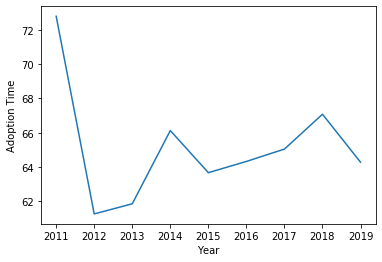

In [21]:
ax = sns.lineplot(x='Year', y='Adoption Time', data=tydf[8:17])

In [27]:
alldogs_year = alldogs_merged[alldogs_merged['year'] >= 2015]

In [28]:
alldogs_year = alldogs_year[alldogs_year['year'] <= 2019]

In [29]:
len(alldogs_year)

709530

In [11]:
alldogs_year.groupby('month')['adoption_time'].mean().sort_values()

month
8     57.733467
5     58.336647
3     58.903002
4     60.224461
6     60.682694
2     62.149868
7     63.089704
12    63.235770
11    63.978540
10    67.510244
9     72.287168
1     90.359256
Name: adoption_time, dtype: float64

In [13]:
alldogs_year.groupby('contact.address.state')['adoption_time'].mean().sort_values()

contact.address.state
MT     27.106177
ID     32.793261
MA     35.887956
OR     39.156860
CO     39.176136
NH     40.242068
WI     42.400867
RI     45.503346
SC     47.184469
IL     47.184934
KS     47.968023
OH     48.101776
WA     49.291108
NJ     52.181629
WY     53.744130
MD     53.896849
VT     53.997183
CT     54.055388
KY     54.687719
MN     55.005669
PA     58.397293
IN     58.398325
GA     60.170324
ME     62.050048
LA     62.055538
AR     65.572507
MS     67.256293
WV     69.679245
CA     69.839142
VA     71.376932
IA     71.808607
UT     72.596894
SD     73.270777
AL     76.111783
TN     76.179214
MI     77.320471
NY     79.316067
FL     81.583583
AZ     82.648072
ND     83.162210
OK     85.146336
DE     92.433011
AK     96.318218
NE    101.236522
NM    101.290124
TX    104.615195
NC    120.649395
NV    126.796669
MO    196.583009
Name: adoption_time, dtype: float64

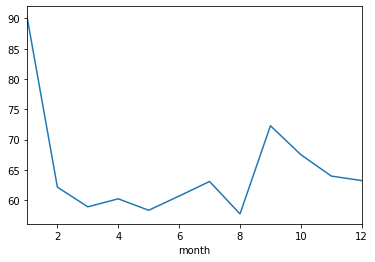

In [219]:
m.plot()

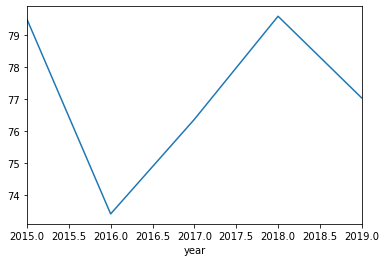

In [21]:
y=alldogs_year.groupby('year')['adoption_time'].mean()
y.plot()

## Remove outliers based on z-score
### (need to log transform to gaussian ish first)

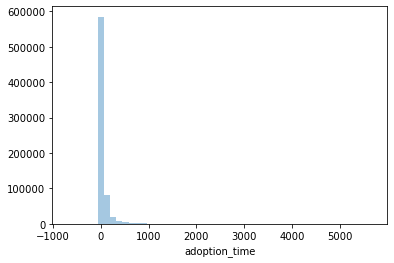

In [30]:
sns.distplot(alldogs_year['adoption_time'], kde=False)

In [31]:
#remove negative days error
alldogs_year = alldogs_year[alldogs_year['adoption_time']>=0]

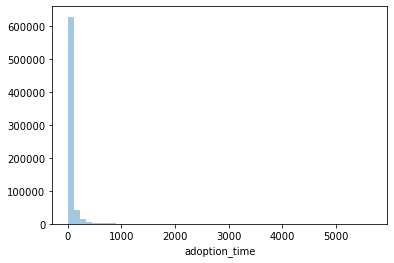

In [32]:
sns.distplot(alldogs_year['adoption_time'], kde=False)

In [33]:
alldogs_year['log_adpt_time'] = alldogs_year.apply(lambda x: np.log((x['adoption_time'])+1.1), axis=1)

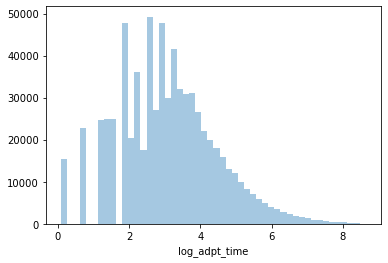

In [34]:
sns.distplot(alldogs_year['log_adpt_time'], kde=False)

In [35]:
from scipy import stats
z = (stats.zscore(alldogs_year['log_adpt_time']))
len(np.where(z >= 2.5)[0])

9707

In [36]:
alldogs_year_otl = alldogs_year[z<2.5]
len(alldogs_year_otl)

699822

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Adoption time (days)')]

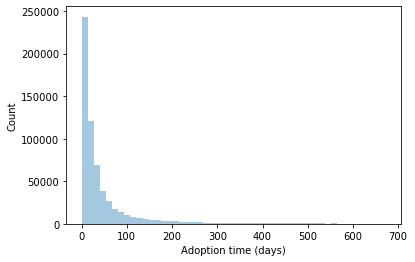

In [98]:
ax = sns.distplot(alldogs_year_otl['adoption_time'], kde=False)
ax.set(xlabel='Adoption time (days)', ylabel='Count')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'log(Adoption time)')]

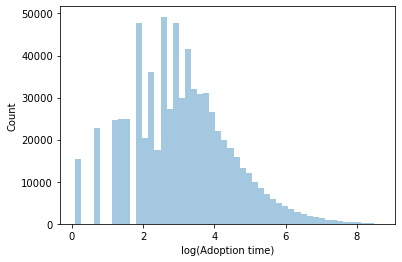

In [99]:
ax = sns.distplot(alldogs_year['log_adpt_time'], kde=False)
ax.set(xlabel='log(Adoption time)', ylabel='Count')

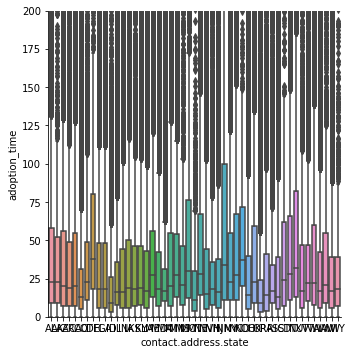

In [39]:
sizeplot3 = sns.catplot(x='contact.address.state', y='adoption_time', data=alldogs_year_otl, kind='box');
sizeplot3.set(ylim=(0,200))

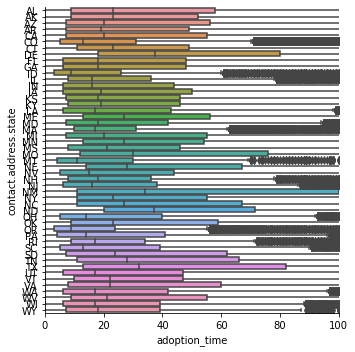

In [41]:
sizeplot3 = sns.catplot(y='contact.address.state', x='adoption_time', data=alldogs_year_otl, kind='box');
sizeplot3.set(xlim=(0,100))

In [42]:
# dogs with special needs need 2.08 times more time
alldogs_year_otl.groupby('attributes.special_needs')['adoption_time'].mean().sort_values()

attributes.special_needs
False    45.753490
True     95.330781
Name: adoption_time, dtype: float64

In [43]:
#remove dogs with special needs from model
alldogs_year_otl = alldogs_year_otl[alldogs_year_otl['attributes.special_needs']==False]
len(alldogs_year_otl)

687282

In [44]:
# correlation != causation here, maybe because they were there longer they got shots
alldogs_year_otl.groupby('attributes.shots_current')['adoption_time'].mean().sort_values()

attributes.shots_current
False    37.000473
True     46.948122
Name: adoption_time, dtype: float64

In [45]:
#remove dogs with special needs from model
alldogs_year_otl = alldogs_year_otl[alldogs_year_otl['attributes.shots_current']==True]
len(alldogs_year_otl)

604745

In [46]:
#1 week -23%, 2 weeks = 43%, 1 month - 64%%, 90 days - 87%
(len(alldogs_year_otl[alldogs_year_otl['adoption_time']<90])/len(alldogs_year_otl))*100

86.73755053783

In [47]:
def categorize_times(time):
    if time < 7:
        return '< 1 week'
    elif time <= 14:
        return '1 - 2 weeks'
    elif time < 30:
        return '< 1 month'
    elif time < 90:
        return '< 3 months'
    else:
        return '> 3 months'

In [48]:
alldogs_year_otl['cg_adpt_time'] = alldogs_year_otl.apply(lambda x: categorize_times(x['adoption_time']), axis=1)

In [49]:
alldogs_year_otl.head()

,adoption_time,age,attributes.declawed,attributes.house_trained,attributes.shots_current,attributes.spayed_neutered,attributes.special_needs,breeds.mixed,breeds.primary,breeds.secondary,...,organization_id,published_at,size,status,status_changed_at,tags,url,year,log_adpt_time,cg_adpt_time
1,96,Adult,NaN,True,True,True,False,False,Japanese Chin,NaN,...,CA712,2016-08-08T19:15:43+0000,Small,adopted,2016-11-13T08:14:08+0000,[],https://www.petfinder.com/dog/bess-located-in-...,2016,4.575741,> 3 months
2,98,Young,NaN,True,True,True,False,True,Scottish Terrier,NaN,...,TX1860,2014-10-14T09:20:08+0000,Small,adopted,2015-01-20T17:31:49+0000,[],https://www.petfinder.com/dog/madonna-30542160...,2015,4.596129,> 3 months
3,32,Adult,NaN,True,True,True,False,False,Bullmastiff,NaN,...,FL653,2018-02-21T00:02:35+0000,Extra Large,adopted,2018-03-25T13:18:45+0000,[],https://www.petfinder.com/dog/al-sweetie-birmi...,2018,3.499533,< 3 months
4,16,Young,NaN,True,True,True,False,False,Bullmastiff,NaN,...,FL653,2015-10-26T11:05:40+0000,Large,adopted,2015-11-11T18:28:03+0000,[],https://www.petfinder.com/dog/al-rosie-prattvi...,2015,2.839078,< 1 month
5,56,Adult,NaN,True,True,True,False,False,Bullmastiff,NaN,...,FL653,2016-06-24T16:49:40+0000,Extra Large,adopted,2016-08-20T13:23:19+0000,[],https://www.petfinder.com/dog/al-tank-montgome...,2016,4.044804,< 3 months


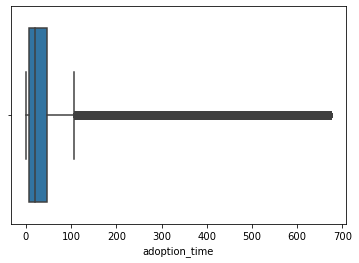

In [50]:
sns.boxplot(x=alldogs_year_otl['adoption_time'])

In [51]:
alldogs_year_otl['cg_adpt_time'].value_counts()

< 3 months     142108
< 1 week       136956
< 1 month      126695
1 - 2 weeks    118782
> 3 months      80204
Name: cg_adpt_time, dtype: int64

In [52]:
len(alldogs_year_otl[alldogs_year_otl['gender']=='Unknown'])

0

In [53]:
alldogs_nm = alldogs_year_otl[alldogs_year_otl['gender']!='Unknown']
len(alldogs_nm)

604745

In [54]:
# Check for any missing data
print("Table size -", end=' ')
print(alldogs_nm.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (alldogs_year_otl.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
missing_cols = [col for col in alldogs_year_otl.columns
                     if alldogs_year_otl[col].isnull().any()]

Table size - (604745, 36)
Checking for missing values..
attributes.declawed         604745
breeds.secondary            378861
coat                        184552
colors.primary              141382
colors.secondary            364106
colors.tertiary             593772
contact.address.postcode        15
environment.cats            487161
environment.children        413701
environment.dogs            383513
dtype: int64


In [55]:
alldogs_year_otl['contact.address.postcode'] = alldogs_year_otl['contact.address.postcode'].fillna(method='ffill')

In [56]:
# Check for any missing data
print("Table size -", end=' ')
print(alldogs_nm.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (alldogs_year_otl.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
missing_cols = [col for col in alldogs_year_otl.columns
                     if alldogs_year_otl[col].isnull().any()]

Table size - (604745, 36)
Checking for missing values..
attributes.declawed     604745
breeds.secondary        378861
coat                    184552
colors.primary          141382
colors.secondary        364106
colors.tertiary         593772
environment.cats        487161
environment.children    413701
environment.dogs        383513
dtype: int64


In [120]:
#not needed for this set
#alldogs_nm = alldogs_merged.fillna({'name':'Unknown'})

In [99]:
# recheck for any missing data
print("Table size -", end=' ')
print(alldogs_nm.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (alldogs_nm.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
missing_cols = [col for col in alldogs_nm.columns
                     if alldogs_nm[col].isnull().any()]

Table size - (90628, 38)
Checking for missing values..
coat                    35414
breeds.secondary        52059
colors.primary          23938
colors.secondary        55765
colors.tertiary         88930
attributes.declawed     90628
environment.children    65588
environment.dogs        57343
environment.cats        75276
dtype: int64


In [57]:
alldogs_nm = alldogs_year_otl.drop(missing_cols, axis=1)

In [58]:
alldogs_nm.head()

,adoption_time,age,attributes.house_trained,attributes.shots_current,attributes.spayed_neutered,attributes.special_needs,breeds.mixed,breeds.primary,breeds.unknown,contact.address.city,...,organization_id,published_at,size,status,status_changed_at,tags,url,year,log_adpt_time,cg_adpt_time
1,96,Adult,True,True,True,False,False,Japanese Chin,False,Birmingham,...,CA712,2016-08-08T19:15:43+0000,Small,adopted,2016-11-13T08:14:08+0000,[],https://www.petfinder.com/dog/bess-located-in-...,2016,4.575741,> 3 months
2,98,Young,True,True,True,False,True,Scottish Terrier,False,Birmingham,...,TX1860,2014-10-14T09:20:08+0000,Small,adopted,2015-01-20T17:31:49+0000,[],https://www.petfinder.com/dog/madonna-30542160...,2015,4.596129,> 3 months
3,32,Adult,True,True,True,False,False,Bullmastiff,False,Birmingham,...,FL653,2018-02-21T00:02:35+0000,Extra Large,adopted,2018-03-25T13:18:45+0000,[],https://www.petfinder.com/dog/al-sweetie-birmi...,2018,3.499533,< 3 months
4,16,Young,True,True,True,False,False,Bullmastiff,False,Birmingham,...,FL653,2015-10-26T11:05:40+0000,Large,adopted,2015-11-11T18:28:03+0000,[],https://www.petfinder.com/dog/al-rosie-prattvi...,2015,2.839078,< 1 month
5,56,Adult,True,True,True,False,False,Bullmastiff,False,Birmingham,...,FL653,2016-06-24T16:49:40+0000,Extra Large,adopted,2016-08-20T13:23:19+0000,[],https://www.petfinder.com/dog/al-tank-montgome...,2016,4.044804,< 3 months


In [59]:
len(alldogs_nm)

604745

In [60]:
#remove negative days error
alldogs_nm = alldogs_nm[alldogs_nm['adoption_time']>=0]

In [61]:
len(alldogs_nm)

604745

In [179]:
alldogs_nm.columns

Index(['adoption_time', 'age', 'attributes.house_trained',
       'attributes.shots_current', 'attributes.spayed_neutered',
       'attributes.special_needs', 'breeds.mixed', 'breeds.primary',
       'breeds.unknown', 'contact.address.city', 'contact.address.postcode',
       'contact.address.state', 'distance', 'gender', 'id', 'month', 'name',
       'organization_id', 'published_at', 'size', 'status',
       'status_changed_at', 'tags', 'url', 'year', 'log_adpt_time',
       'cg_adpt_time'],
      dtype='object')

In [25]:
namelist = alldogs_nm['name'].value_counts()
namelist.head()

Bella      2150
Daisy      1879
Buddy      1797
Max        1791
Charlie    1714
Name: name, dtype: int64

In [26]:
len(namelist)

159418

In [260]:
namelist[alldogs_nm['name'].iloc[89983]]/namelist.max()

0.00040404040404040404

In [261]:
maxname = namelist.max()

In [262]:
alldogs_nm[alldogs_nm['name'].isnull()]

,adoption_time,age,attributes.house_trained,attributes.shots_current,attributes.spayed_neutered,attributes.special_needs,breeds.mixed,breeds.primary,breeds.unknown,contact.address.city,...,organization_id,published_at,size,status,status_changed_at,tags,url,year,log_adpt_time,cg_adpt_time


In [107]:
def get_norm_name_freq(name):
    return namelist[name]/maxname
get_norm_name_freq(alldogs_nm['name'].iloc[0])

0.21978021978021978

In [108]:
alldogs_nm['norm_name_freq'] = alldogs_nm.apply(lambda x: get_norm_name_freq(x['name']), axis=1)
alldogs_nm.head()

,id,organization_id,url,age,gender,size,tags,name,status,status_changed_at,...,contact.address.state,contact.address.postcode,adoption_time,month,year,log_adpt_time,mod_adpt_time,logmod_adpt_time,cg_adpt_time,norm_name_freq
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,[],Sunny,adopted,2015-12-11T20:50:51+0000,...,CA,90013,19,12,2015,3.000720,1.903654,4.779123,< 1 month,0.219780
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,[],Batman,adopted,2015-12-21T22:23:16+0000,...,CA,90013,29,12,2015,3.404525,2.036168,4.859812,< 1 month,0.109890
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,[],Benji,adopted,2015-12-30T01:22:04+0000,...,CA,90013,18,12,2015,2.949688,1.888175,4.770685,< 1 month,0.267399
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,[],Zuma,adopted,2016-02-12T19:13:27+0000,...,CA,90013,57,2,2016,4.062166,2.290172,5.056246,< 100 days,0.025641
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,[],Diego,adopted,2015-12-30T01:21:59+0000,...,CA,90013,8,12,2015,2.208274,1.695218,4.682131,1 - 2 weeks,0.095238


In [62]:
breedlist = alldogs_nm['breeds.primary'].value_counts()
breedlist.head()

Labrador Retriever    76253
Chihuahua             44890
Pit Bull Terrier      34560
Terrier               29475
Shepherd              23530
Name: breeds.primary, dtype: int64

In [63]:
len(breedlist)

261

In [182]:
(breedlist<=1000).sum()

188

In [184]:
breedlist[(breedlist>100) & (breedlist<=1000)].sum()

35333

In [185]:
breedlist[(breedlist>100) & (breedlist<=1000)]

Flat-Coated Retriever                 1000
Akita                                  980
Dalmatian                              919
Cavalier King Charles Spaniel          895
Basenji                                881
                                      ... 
Nova Scotia Duck Tolling Retriever     104
Mountain Dog                           104
Presa Canario                          103
Sheep Dog                              101
Blue Lacy                              101
Name: breeds.primary, Length: 83, dtype: int64

In [64]:
def get_norm_breed_freq(breed):
    return breedlist[breed]/breedlist.max()
alldogs_nm['breeds.primary'].iloc[0]
get_norm_breed_freq(alldogs_nm['breeds.primary'].iloc[0])

0.0030818459601589447

In [65]:
alldogs_nm['norm_breed_freq'] = alldogs_nm.apply(lambda x: get_norm_breed_freq(x['breeds.primary']), axis=1)
alldogs_nm.head()

,adoption_time,age,attributes.house_trained,attributes.shots_current,attributes.spayed_neutered,attributes.special_needs,breeds.mixed,breeds.primary,breeds.unknown,contact.address.city,...,published_at,size,status,status_changed_at,tags,url,year,log_adpt_time,cg_adpt_time,norm_breed_freq
1,96,Adult,True,True,True,False,False,Japanese Chin,False,Birmingham,...,2016-08-08T19:15:43+0000,Small,adopted,2016-11-13T08:14:08+0000,[],https://www.petfinder.com/dog/bess-located-in-...,2016,4.575741,> 3 months,0.003082
2,98,Young,True,True,True,False,True,Scottish Terrier,False,Birmingham,...,2014-10-14T09:20:08+0000,Small,adopted,2015-01-20T17:31:49+0000,[],https://www.petfinder.com/dog/madonna-30542160...,2015,4.596129,> 3 months,0.006990
3,32,Adult,True,True,True,False,False,Bullmastiff,False,Birmingham,...,2018-02-21T00:02:35+0000,Extra Large,adopted,2018-03-25T13:18:45+0000,[],https://www.petfinder.com/dog/al-sweetie-birmi...,2018,3.499533,< 3 months,0.006583
4,16,Young,True,True,True,False,False,Bullmastiff,False,Birmingham,...,2015-10-26T11:05:40+0000,Large,adopted,2015-11-11T18:28:03+0000,[],https://www.petfinder.com/dog/al-rosie-prattvi...,2015,2.839078,< 1 month,0.006583
5,56,Adult,True,True,True,False,False,Bullmastiff,False,Birmingham,...,2016-06-24T16:49:40+0000,Extra Large,adopted,2016-08-20T13:23:19+0000,[],https://www.petfinder.com/dog/al-tank-montgome...,2016,4.044804,< 3 months,0.006583


In [66]:
alldogs_nm['norm_breed_freq'].describe()

count    604745.000000
mean          0.302959
std           0.311070
min           0.000013
25%           0.065506
50%           0.190484
75%           0.453228
max           1.000000
Name: norm_breed_freq, dtype: float64

In [113]:
pd.qcut(alldogs_nm['norm_name_freq'], q=[0, 0.33, 0.67, 1], labels = ['Low', 'Medium', 'High'])

0           High
1           High
2           High
3         Medium
4           High
           ...  
184384      High
184385      High
184386    Medium
184387       Low
184388    Medium
Name: norm_name_freq, Length: 90628, dtype: category
Categories (3, object): [Low < Medium < High]

In [114]:
alldogs_nm['name_pop'] = pd.qcut(alldogs_nm['norm_name_freq'], q=[0, 0.33, 0.67, 1], labels = ['Low', 'Medium', 'High'])

In [115]:
alldogs_nm['name_pop'].value_counts()

Low       33137
High      29506
Medium    27985
Name: name_pop, dtype: int64

In [67]:
alldogs_nm['breed_pop'] = pd.qcut(alldogs_nm['norm_breed_freq'], q=[0, 0.33, 0.67, 1], labels = ['Low', 'Medium', 'High'])
alldogs_nm['breed_pop'].value_counts()

Medium    218555
Low       201012
High      185178
Name: breed_pop, dtype: int64

In [68]:
alldogs_nm.groupby('breed_pop')['adoption_time'].mean().sort_values()

breed_pop
Medium    43.215964
High      48.717682
Low       49.375828
Name: adoption_time, dtype: float64

In [191]:
alldogs_nm.groupby('name_pop')['adoption_time'].mean().sort_values()

KeyError: 'name_pop'

In [69]:
alldogs_nm.head()

,adoption_time,age,attributes.house_trained,attributes.shots_current,attributes.spayed_neutered,attributes.special_needs,breeds.mixed,breeds.primary,breeds.unknown,contact.address.city,...,size,status,status_changed_at,tags,url,year,log_adpt_time,cg_adpt_time,norm_breed_freq,breed_pop
1,96,Adult,True,True,True,False,False,Japanese Chin,False,Birmingham,...,Small,adopted,2016-11-13T08:14:08+0000,[],https://www.petfinder.com/dog/bess-located-in-...,2016,4.575741,> 3 months,0.003082,Low
2,98,Young,True,True,True,False,True,Scottish Terrier,False,Birmingham,...,Small,adopted,2015-01-20T17:31:49+0000,[],https://www.petfinder.com/dog/madonna-30542160...,2015,4.596129,> 3 months,0.006990,Low
3,32,Adult,True,True,True,False,False,Bullmastiff,False,Birmingham,...,Extra Large,adopted,2018-03-25T13:18:45+0000,[],https://www.petfinder.com/dog/al-sweetie-birmi...,2018,3.499533,< 3 months,0.006583,Low
4,16,Young,True,True,True,False,False,Bullmastiff,False,Birmingham,...,Large,adopted,2015-11-11T18:28:03+0000,[],https://www.petfinder.com/dog/al-rosie-prattvi...,2015,2.839078,< 1 month,0.006583,Low
5,56,Adult,True,True,True,False,False,Bullmastiff,False,Birmingham,...,Extra Large,adopted,2016-08-20T13:23:19+0000,[],https://www.petfinder.com/dog/al-tank-montgome...,2016,4.044804,< 3 months,0.006583,Low


In [70]:
breedsdf = alldogs_nm.loc[:,['breeds.primary','breed_pop', 'norm_breed_freq']]
breedsdf.head()

,breeds.primary,breed_pop,norm_breed_freq
1,Japanese Chin,Low,0.003082
2,Scottish Terrier,Low,0.006990
3,Bullmastiff,Low,0.006583
4,Bullmastiff,Low,0.006583
5,Bullmastiff,Low,0.006583


In [71]:
breedsdf = breedsdf.drop_duplicates()

In [72]:
# with <1000 occurences
alldogs_nm.loc[alldogs_nm['norm_breed_freq'] <= 0.015, 'breeds.primary'] = 'Rare'

In [73]:
# with <100 occurences
alldogs_nm.loc[alldogs_nm['norm_breed_freq'] <= 0.0015, 'breeds.primary'] = 'Very Rare'

In [74]:
def conv_breed(breed, freq):
    if freq<=0.0015:
        return 'Very Rare'
    elif freq<=0.015:
        return 'Rare'
    else:
        return breed

In [75]:
breedsdf.head()

,breeds.primary,breed_pop,norm_breed_freq
1,Japanese Chin,Low,0.003082
2,Scottish Terrier,Low,0.006990
3,Bullmastiff,Low,0.006583
129,Golden Retriever,Low,0.081020
283,Flat-Coated Retriever,Low,0.013114


In [76]:
breedsdf['breedconv'] = breedsdf.apply(lambda x: conv_breed(x['breeds.primary'], x['norm_breed_freq']), axis=1)

In [77]:
breedsdf

,breeds.primary,breed_pop,norm_breed_freq,breedconv
1,Japanese Chin,Low,0.003082,Rare
2,Scottish Terrier,Low,0.006990,Rare
3,Bullmastiff,Low,0.006583,Rare
129,Golden Retriever,Low,0.081020,Golden Retriever
283,Flat-Coated Retriever,Low,0.013114,Rare
...,...,...,...,...
804873,Aussiedoodle,Low,0.000013,Very Rare
1049037,Shih poo,Low,0.000013,Very Rare
1143590,Sheepadoodle,Low,0.000013,Very Rare
1232167,South Russian Ovtcharka,Low,0.000013,Very Rare


In [43]:
breedsdf.to_csv('breedlist_all_a4.csv', header=True, index=False)

In [78]:
alldogs_nm['breeds.primary'].value_counts()

Labrador Retriever                      76253
Chihuahua                               44890
Rare                                    39950
Pit Bull Terrier                        34560
Terrier                                 29475
                                        ...  
Black Mouth Cur                          1350
West Highland White Terrier / Westie     1297
German Shorthaired Pointer               1249
Weimaraner                               1238
Bull Terrier                             1213
Name: breeds.primary, Length: 70, dtype: int64

In [79]:
# replace less occurring states (<5000) with Other
alldogs_nm.loc[(alldogs_nm['contact.address.state'] == 'CT') | (alldogs_nm['contact.address.state'] == 'UT')
               | (alldogs_nm['contact.address.state'] == 'KS') | (alldogs_nm['contact.address.state'] == 'MO')
                  | (alldogs_nm['contact.address.state'] == 'MS') | (alldogs_nm['contact.address.state'] == 'MT')
                    | (alldogs_nm['contact.address.state'] == 'WV') | (alldogs_nm['contact.address.state'] == 'WY')
                        | (alldogs_nm['contact.address.state'] == 'DE') | (alldogs_nm['contact.address.state'] == 'ND')
                            | (alldogs_nm['contact.address.state'] == 'SD') | (alldogs_nm['contact.address.state'] == 'AK'),
                'contact.address.state'] = 'Other'

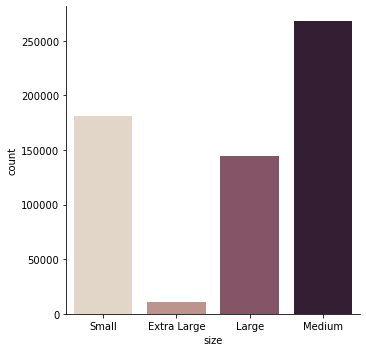

In [80]:
sns.catplot(x="size", kind="count", palette="ch:.25", data=alldogs_nm);

In [81]:
alldogs_nm.loc[alldogs_nm['size'] == 'Extra Large', 'size'] = 'Large'

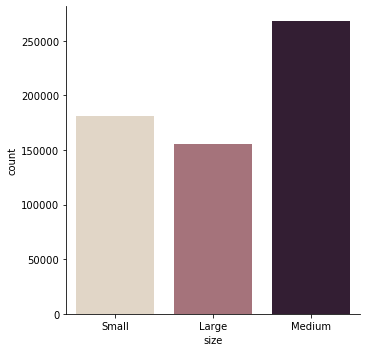

In [82]:
sns.catplot(x="size", kind="count", palette="ch:.25", data=alldogs_nm);

In [65]:
alldogs_nm.columns

Index(['adoption_time', 'age', 'attributes.house_trained',
       'attributes.shots_current', 'attributes.spayed_neutered',
       'attributes.special_needs', 'breeds.mixed', 'breeds.primary',
       'breeds.unknown', 'contact.address.city', 'contact.address.postcode',
       'contact.address.state', 'distance', 'gender', 'id', 'month', 'name',
       'organization_id', 'published_at', 'size', 'status',
       'status_changed_at', 'tags', 'url', 'year', 'log_adpt_time',
       'cg_adpt_time', 'norm_breed_freq', 'breed_pop'],
      dtype='object')

In [236]:
X_features = ['id','age', 'gender', 'size', 'breeds.primary',
              'breeds.mixed', 'attributes.spayed_neutered', 'attributes.house_trained',
               'contact.address.state', 
              'breed_pop', 'month']
X = alldogs_nm[X_features]
X.head()

,id,age,gender,size,breeds.primary,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,contact.address.state,breed_pop,month
1,35898350,Adult,Female,Small,Rare,False,True,True,AL,Low,11
2,30542160,Young,Female,Small,Rare,True,True,True,AL,Low,1
3,41000971,Adult,Female,Large,Rare,False,True,True,AL,Low,3
4,33618001,Young,Female,Large,Rare,False,True,True,AL,Low,11
5,35479179,Adult,Male,Large,Rare,False,True,True,AL,Low,8


In [209]:
X['age'].value_counts()

Adult     200545
Baby      193905
Young     184998
Senior     25297
Name: age, dtype: int64

In [210]:
X['gender'].value_counts()

Male      309353
Female    295392
Name: gender, dtype: int64

In [211]:
X['size'].value_counts()

Medium    268166
Small     180841
Large     155738
Name: size, dtype: int64

In [237]:
X['contact.address.state'].value_counts()

CO       37797
MA       26808
Other    26095
AZ       24999
NY       22559
LA       22158
MD       22153
WA       20794
MN       20314
MI       20195
OH       18821
CA       18754
WI       18450
OK       18404
IL       18395
GA       18307
IN       16971
TX       16794
TN       16757
OR       16000
NV       14853
AL       14676
SC       14480
NC       14014
NH       12980
FL       11965
KY       10828
ME       10780
VA        9449
NJ        9386
PA        8954
RI        8686
AR        8434
NE        7608
VT        7363
IA        6386
NM        6219
ID        6159
Name: contact.address.state, dtype: int64

In [238]:
X['attributes.house_trained'].value_counts()

False    360785
True     243960
Name: attributes.house_trained, dtype: int64

In [239]:
X['attributes.spayed_neutered'].value_counts()

True     510168
False     94577
Name: attributes.spayed_neutered, dtype: int64

In [215]:
X.head()

,id,age,gender,size,breeds.primary,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,contact.address.state,breed_pop,month
1,35898350,Adult,Female,Small,Rare,False,True,True,AL,Low,11
2,30542160,Young,Female,Small,Rare,True,True,True,AL,Low,1
3,41000971,Adult,Female,Large,Rare,False,True,True,AL,Low,3
4,33618001,Young,Female,Large,Rare,False,True,True,AL,Low,11
5,35479179,Adult,Male,Large,Rare,False,True,True,AL,Low,8


In [240]:
y = alldogs_nm['cg_adpt_time']

In [241]:
y.value_counts()

< 3 months     142108
< 1 week       136956
< 1 month      126695
1 - 2 weeks    118782
> 3 months      80204
Name: cg_adpt_time, dtype: int64

In [242]:
len(X)

604745

In [243]:
cat_col = ['age','gender','size','contact.address.state', 'breed_pop', 'month']

In [244]:
X[cat_col]=X[cat_col].astype('category')

C:\anaconda_python\envs\Insight\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [245]:
total = pd.concat([X,y], axis=1)
total.head()

,id,age,gender,size,breeds.primary,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,contact.address.state,breed_pop,month,cg_adpt_time
1,35898350,Adult,Female,Small,Rare,False,True,True,AL,Low,11,> 3 months
2,30542160,Young,Female,Small,Rare,True,True,True,AL,Low,1,> 3 months
3,41000971,Adult,Female,Large,Rare,False,True,True,AL,Low,3,< 3 months
4,33618001,Young,Female,Large,Rare,False,True,True,AL,Low,11,< 1 month
5,35479179,Adult,Male,Large,Rare,False,True,True,AL,Low,8,< 3 months


In [73]:
X.dtypes

id                               int64
age                           category
gender                        category
size                          category
breeds.primary                  object
breeds.mixed                      bool
attributes.spayed_neutered        bool
attributes.house_trained          bool
attributes.special_needs          bool
attributes.shots_current          bool
contact.address.state         category
breed_pop                     category
month                         category
dtype: object

In [74]:
len(total)

604745

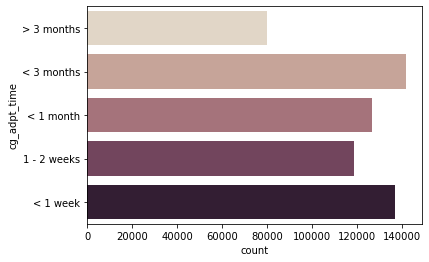

In [246]:
timeplot = sns.countplot(y='cg_adpt_time', data=total, palette="ch:.25")

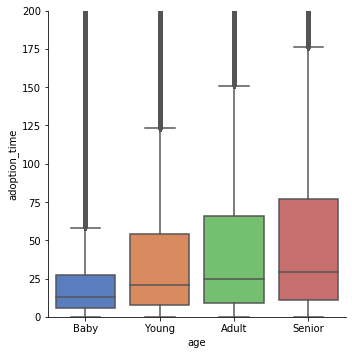

In [97]:
sizeplot2 = sns.catplot(x='age', y='adoption_time', order=["Baby", "Young", "Adult", "Senior"] , data=alldogs_nm, kind='box', palette="muted");
sizeplot2.set(ylim=(0,200))

In [76]:
nameplot = sns.countplot(y='cg_adpt_time', hue='name_pop', data=total, palette="ch:.25")

ValueError: Could not interpret input 'name_pop'

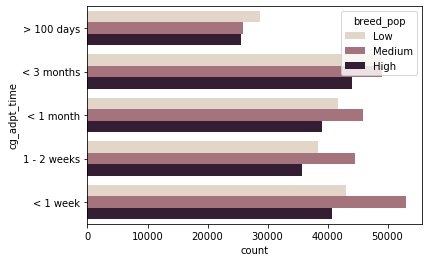

In [77]:
breedplot = sns.countplot(y='cg_adpt_time', hue='breed_pop', data=total, palette="ch:.25")

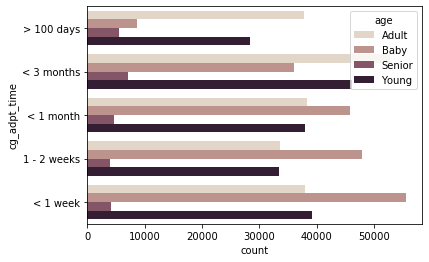

In [78]:
ageplot = sns.countplot(y='cg_adpt_time', hue='age', data=total, palette="ch:.25")

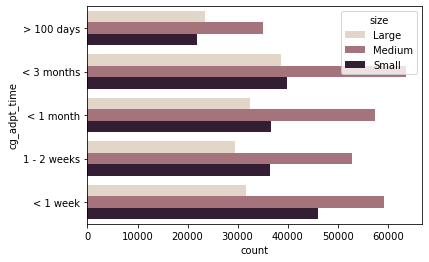

In [79]:
ageplot = sns.countplot(y='cg_adpt_time', hue='size', data=total, palette="ch:.25")

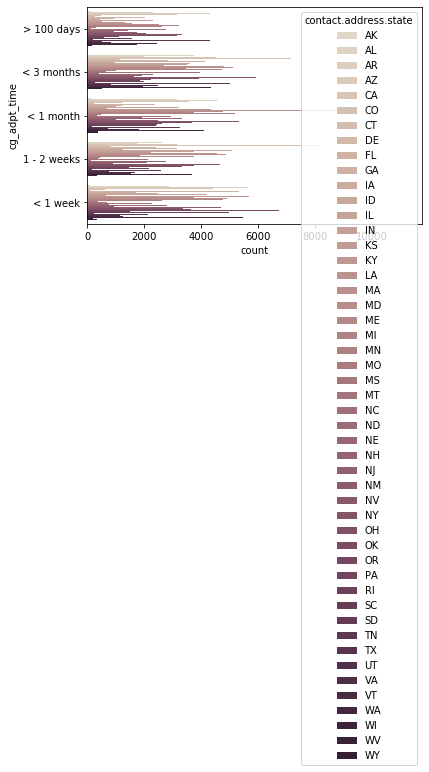

In [80]:
ageplot = sns.countplot(y='cg_adpt_time', hue='contact.address.state', data=total, palette="ch:.25")

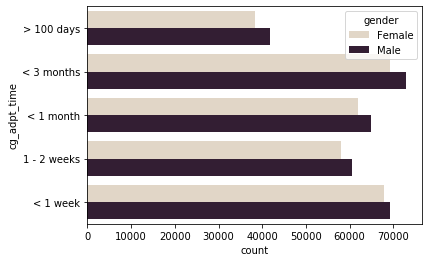

In [81]:
ageplot = sns.countplot(y='cg_adpt_time', hue='gender', data=total, palette="ch:.25")

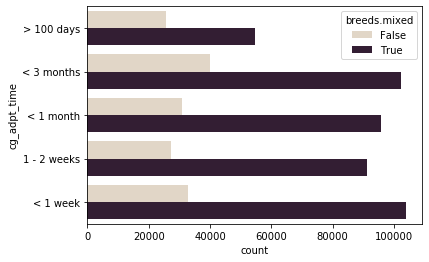

In [82]:
ageplot = sns.countplot(y='cg_adpt_time', hue='breeds.mixed', data=total, palette="ch:.25")

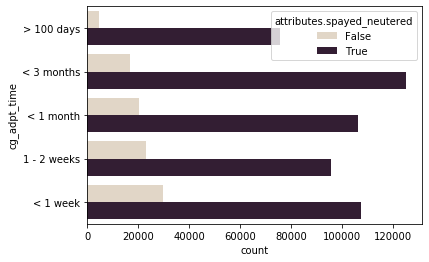

In [83]:
ageplot = sns.countplot(y='cg_adpt_time', hue='attributes.spayed_neutered', data=total, palette="ch:.25")

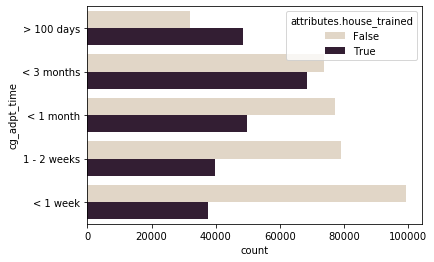

In [84]:
ageplot = sns.countplot(y='cg_adpt_time', hue='attributes.house_trained', data=total, palette="ch:.25")

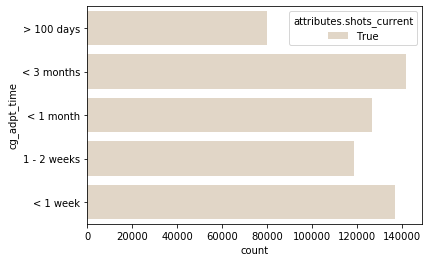

In [85]:
ageplot = sns.countplot(y='cg_adpt_time', hue='attributes.shots_current', data=total, palette="ch:.25")

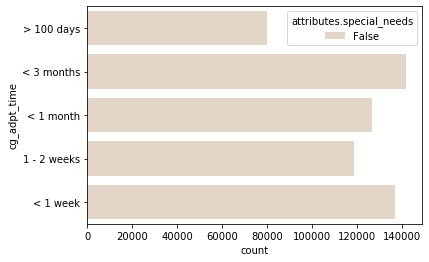

In [86]:
ageplot = sns.countplot(y='cg_adpt_time', hue='attributes.special_needs', data=total, palette="ch:.25")

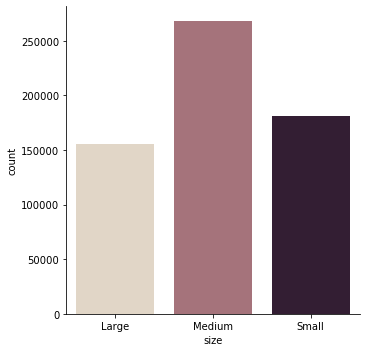

In [87]:
sns.catplot(x="size", kind="count", palette="ch:.25", data=total);

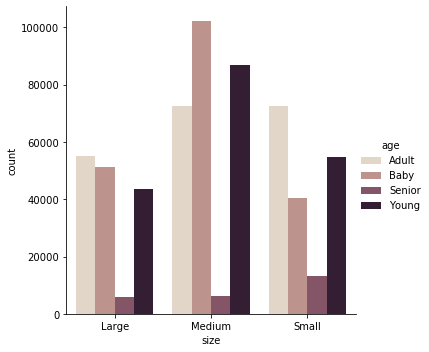

In [88]:
sns.catplot(x="size", kind="count", hue="age", palette="ch:.25", data=total);

<Figure size 864x4608 with 0 Axes>

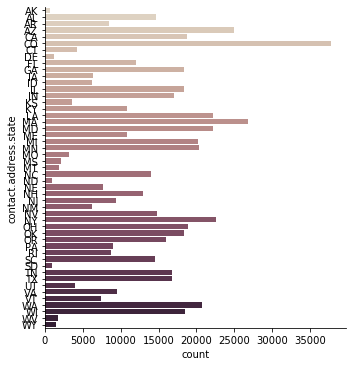

In [89]:
plt.figure(figsize=(12, 64))
sns.catplot(y="contact.address.state", kind="count", palette="ch:.25", data=total);

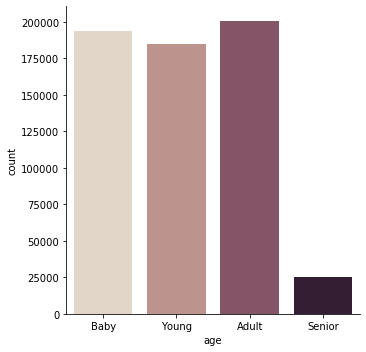

In [90]:
sns.catplot(x="age", kind="count", palette="ch:.25",order=["Baby", "Young", "Adult", "Senior"], data=total);

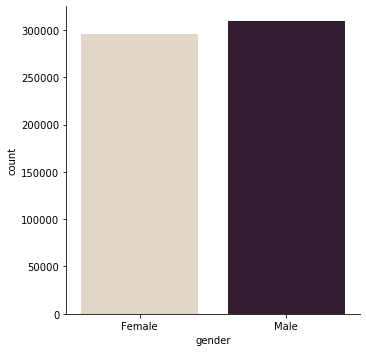

In [91]:
sns.catplot(x="gender", kind="count", palette="ch:.25", data=total);

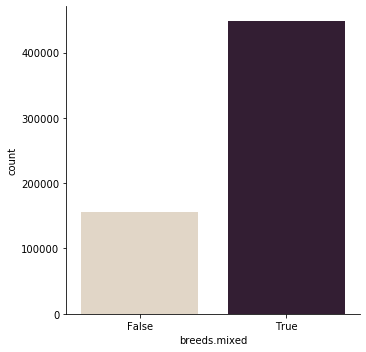

In [92]:
sns.catplot(x="breeds.mixed", kind="count", palette="ch:.25", data=total);

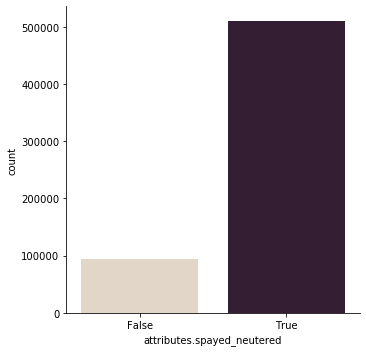

In [93]:
sns.catplot(x="attributes.spayed_neutered", kind="count", palette="ch:.25", data=total);

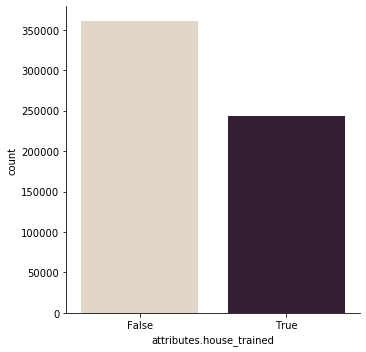

In [94]:
sns.catplot(x="attributes.house_trained", kind="count", palette="ch:.25", data=total);

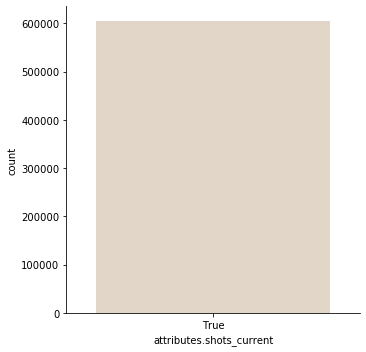

In [95]:
sns.catplot(x="attributes.shots_current", kind="count", palette="ch:.25", data=total);

In [247]:
from sklearn.model_selection import train_test_split
#trainval_X, test_X, trainval_y, test_y = train_test_split(X, y, test_size=0.2)
#use log_adpt_time as feature
trainval_X, test_X, trainval_y, test_y = train_test_split(X, total['cg_adpt_time'], test_size=0.2)
print('Training set size = {} and Test set size = {}'.format(len(trainval_X),len(test_X)))

Training set size = 483796 and Test set size = 120949


In [218]:
X.head()

,id,age,gender,size,breeds.primary,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,contact.address.state,breed_pop,month
1,35898350,Adult,Female,Small,Rare,False,True,True,AL,Low,11
2,30542160,Young,Female,Small,Rare,True,True,True,AL,Low,1
3,41000971,Adult,Female,Large,Rare,False,True,True,AL,Low,3
4,33618001,Young,Female,Large,Rare,False,True,True,AL,Low,11
5,35479179,Adult,Male,Large,Rare,False,True,True,AL,Low,8


In [248]:
total_test = pd.concat([test_X,test_y], axis=1)

In [249]:
export = total_test.to_csv('./data/test_set_all_A4.csv', header=True, index = False)

In [250]:
total_trainval = pd.concat([trainval_X,trainval_y], axis=1)

In [251]:
export = total_trainval.to_csv('./data/trainval_set_all_A4.csv', header=True, index = False)

In [147]:
#from scipy import stats

In [169]:
#bc_adpt_time,lmbda = stats.boxcox((total['adoption_time']+1))

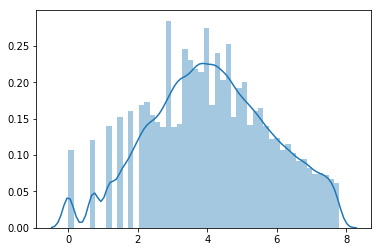

In [170]:
#sns.distplot(bc_adpt_time)

In [171]:
#lmbda

0.13720434611179522

In [172]:
#from scipy.special import boxcox,inv_boxcox

[Text(0, 0.5, 'count'), Text(0.5, 0, 'transformed time')]

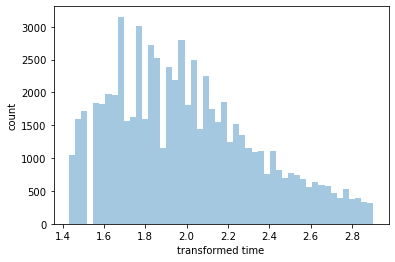

In [251]:
tf_adpt_time = total.apply(lambda x: np.power(((x['adoption_time'])+6),(0.2)), axis=1)
ax = sns.distplot(tf_adpt_time, kde=False)
ax.set(xlabel='transformed time', ylabel='count')

In [86]:
total.head()

,age,gender,size,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,adoption_time
0,Baby,Female,Small,True,True,True,False,True,CA,19
1,Young,Male,Small,False,True,True,False,True,CA,29
2,Young,Male,Medium,False,True,False,False,True,CA,18
3,Adult,Female,Medium,False,True,False,False,True,CA,57
4,Young,Male,Medium,True,True,False,False,True,CA,8


In [87]:
len(X)

153436

In [252]:
total['mod_adpt_time'] = total.apply(lambda x: np.power(((x['adoption_time'])+6),(0.2)), axis=1)

In [186]:
from sklearn.model_selection import train_test_split
#trainval_X, test_X, trainval_y, test_y = train_test_split(X, y, test_size=0.2)
#use log_adpt_time as feature
trainval_X, test_X, trainval_y, test_y = train_test_split(X, total['cg_adpt_time'], test_size=0.2)
print('Training set size = {} and Test set size = {}'.format(len(trainval_X),len(test_X)))

Training set size = 72502 and Test set size = 18126


In [187]:
total_test = pd.concat([test_X,test_y], axis=1)
export = total_test.to_csv('./data/test_set_scoped_cg.csv', header=True, index = False)
total_trainval = pd.concat([trainval_X,trainval_y], axis=1)
export = total_trainval.to_csv('./data/trainval_set_scoped_cg.csv', header=True, index = False)